In [88]:
import pandas as pd
import os
import json
import numpy as np
import seaborn as sns
from scipy import stats
from datetime import datetime

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
os.chdir("D://capstone/")
#analyzing factor:
#current_value_opensea: total volume/no. of sold items, no. of sold items/no. of all items, owners, min price


In [3]:
ds=pd.read_csv("mydataset.csv",parse_dates=['first_trade','last_trade_in_old_data'])
ds.set_index(ds.columns[0],inplace=True)

In [8]:
#ds.drop(["ig_followers"],axis=1,inplace=True)
ds.drop(["google_trend_name"],axis=1,inplace=True)

In [9]:
ds["website"]=ds["website"].apply(lambda x: 1 if type(x)==str else 0)

In [16]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2648 entries, Cryptokittie to Ataricapsulecollection
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   numitems_traded_by2021  2648 non-null   int64         
 1   numtrade_by2021         2648 non-null   int64         
 2   total_volume_by2021     2648 non-null   float64       
 3   category                2648 non-null   object        
 4   first_trade             2648 non-null   datetime64[ns]
 5   last_trade_in_old_data  2648 non-null   datetime64[ns]
 6   numgoogle_search        2648 non-null   int64         
 7   numitems_2022           2648 non-null   float64       
 8   owner_2022              2648 non-null   float64       
 9   min_price_2022          2648 non-null   float64       
 10  total_volume_by2022     2648 non-null   float64       
 11  numitems_left_2022      2648 non-null   int64         
 12  website                 

In [15]:
ds.fillna(0,inplace=True)

In [194]:
ds.iloc[:2,:]

,numtrade_by2021,total_volume_by2021,numgoogle_search,numitems_2022,min_price_2022,website,twitter_followers,mean_trend_b4_2021may,std_trend_b4_2021may,mean_trend_from_may,...,day_per_trade,Collectible,Games,Metaverse,Other,Utility,multiple,owner_ratio,item_ratio,class
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Cryptokittie,366777,55848.640242,2260000,2000000.0,0.0352,1,53800,38.363636,29.207098,32.024390,...,0.003193,0,0,0,0,0,1.260550,0.05675,0.001302,1
Cryptofighter,2139,40.681530,30100,5000.0,0.2000,1,3164,0.000000,0.000000,8.829268,...,0.529687,0,0,0,1,0,20.795678,0.26000,0.043400,2


In [54]:
ds.head()

,numitems_traded_by2021,numtrade_by2021,total_volume_by2021,category,numgoogle_search,numitems_2022,owner_2022,min_price_2022,total_volume_by2022,numitems_left_2022,website,twitter_followers,mean_trend_b4_2021may,std_trend_b4_2021may,mean_trend_from_may,std_trend_from_may,day_per_trade
Unnamed: 0,,,,,,,,,,,,,,,,,
Cryptokittie,321669,366777,5.584864e+04,Art,2260000,2000000.0,113500.0,0.035200,70400.0,2604,1,53800,38.363636,29.207098,32.024390,11.161290,0.003193
Cryptofighter,1855,2139,4.068153e+01,Other,30100,5000.0,1300.0,0.200000,846.0,217,1,3164,0.000000,0.000000,8.829268,27.448044,0.529687
Cryptosaga,586,669,2.870632e+01,Other,776000,3900.0,455.0,0.007231,28.2,0,1,0,0.000000,0.000000,2.439024,15.617376,1.666667
Axie,127984,171278,1.460505e+05,Games,6100000,283800.0,45300.0,0.096899,27500.0,0,1,912300,1.454545,0.687552,46.707317,23.624398,0.005617
Decentraland,9369,13661,1.099707e+08,Metaverse,5740000,97300.0,6700.0,4.728000,289500.0,1021,1,524500,17.909091,8.926976,29.292683,30.350654,0.075910


In [25]:
#drop the data if total_volume_by2022==0
droplist=[]
for i in range(len(ds)):
    if ds["total_volume_by2022"].iloc[i]==0:
        droplist.append(i)
droplist

[215,
 351,
 456,
 632,
 661,
 691,
 949,
 1018,
 1191,
 1300,
 1423,
 1658,
 1809,
 1917,
 1978,
 1984,
 2067]

In [28]:
ds.drop(ds.index[droplist],axis=0,inplace=True)

In [52]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2414 entries, Cryptokittie to Ataricapsulecollection
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   numitems_traded_by2021  2414 non-null   int64  
 1   numtrade_by2021         2414 non-null   int64  
 2   total_volume_by2021     2414 non-null   float64
 3   category                2414 non-null   object 
 4   numgoogle_search        2414 non-null   int64  
 5   numitems_2022           2414 non-null   float64
 6   owner_2022              2414 non-null   float64
 7   min_price_2022          2414 non-null   float64
 8   total_volume_by2022     2414 non-null   float64
 9   numitems_left_2022      2414 non-null   int64  
 10  website                 2414 non-null   int64  
 11  twitter_followers       2414 non-null   int64  
 12  mean_trend_b4_2021may   2414 non-null   float64
 13  std_trend_b4_2021may    2414 non-null   float64
 14  mean_trend_from_

In [42]:
def getnumdate(ds):
    return (ds["last_trade_in_old_data"]-ds["first_trade"]).days

In [45]:
ds["days"]=ds.apply(getnumdate,axis=1)

In [47]:
ds.drop(["last_trade_in_old_data","first_trade"],axis=1,inplace=True)

In [49]:
def daypertrade(ds):
    return (ds["days"]/ds["numtrade_by2021"])

In [50]:
ds["day_per_trade"]=ds.apply(daypertrade,axis=1)

In [51]:
ds.drop(["days"],axis=1,inplace=True)

<AxesSubplot:>

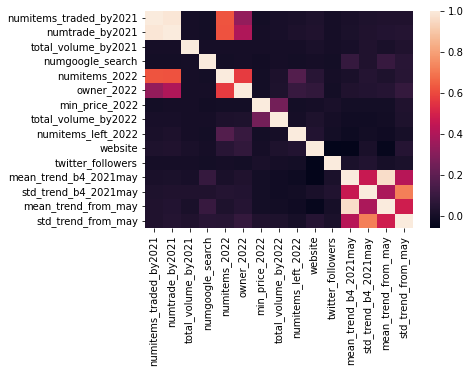

In [32]:
sns.heatmap(ds.corr(),annot=False)

In [56]:
category_df=pd.get_dummies(ds["category"],drop_first=True)
ds=pd.concat([ds,category_df],axis=1)
ds.head()

,numitems_traded_by2021,numtrade_by2021,total_volume_by2021,category,numgoogle_search,numitems_2022,owner_2022,min_price_2022,total_volume_by2022,numitems_left_2022,...,mean_trend_b4_2021may,std_trend_b4_2021may,mean_trend_from_may,std_trend_from_may,day_per_trade,Collectible,Games,Metaverse,Other,Utility
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Cryptokittie,321669,366777,5.584864e+04,Art,2260000,2000000.0,113500.0,0.035200,70400.0,2604,...,38.363636,29.207098,32.024390,11.161290,0.003193,0,0,0,0,0
Cryptofighter,1855,2139,4.068153e+01,Other,30100,5000.0,1300.0,0.200000,846.0,217,...,0.000000,0.000000,8.829268,27.448044,0.529687,0,0,0,1,0
Cryptosaga,586,669,2.870632e+01,Other,776000,3900.0,455.0,0.007231,28.2,0,...,0.000000,0.000000,2.439024,15.617376,1.666667,0,0,0,1,0
Axie,127984,171278,1.460505e+05,Games,6100000,283800.0,45300.0,0.096899,27500.0,0,...,1.454545,0.687552,46.707317,23.624398,0.005617,0,1,0,0,0
Decentraland,9369,13661,1.099707e+08,Metaverse,5740000,97300.0,6700.0,4.728000,289500.0,1021,...,17.909091,8.926976,29.292683,30.350654,0.075910,0,0,1,0,0


In [57]:
ds.drop(["category"],axis=1,inplace=True)

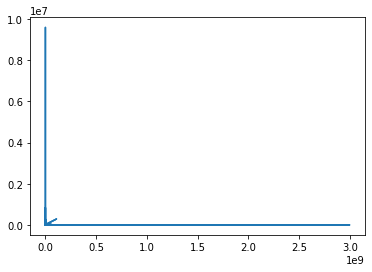

In [58]:
#compare total_volume_by2021 and total_volume_by2022
plt.plot(ds["total_volume_by2021"],ds["total_volume_by2022"])

In [59]:
def mul(ds):
    return (ds["total_volume_by2022"]/ds["total_volume_by2021"])

In [61]:
ds["multiple"]=ds.apply(mul,axis=1)

In [62]:
ds.drop(["total_volume_by2022"],axis=1,inplace=True)

In [84]:
ds.head()

,numtrade_by2021,total_volume_by2021,numgoogle_search,numitems_2022,min_price_2022,website,twitter_followers,mean_trend_b4_2021may,std_trend_b4_2021may,mean_trend_from_may,...,day_per_trade,Collectible,Games,Metaverse,Other,Utility,multiple,owner_ratio,item_ratio,class
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Cryptokittie,366777,5.584864e+04,2260000,2000000.0,0.035200,1,53800,38.363636,29.207098,32.024390,...,0.003193,0,0,0,0,0,1.260550,0.056750,0.001302,1
Cryptofighter,2139,4.068153e+01,30100,5000.0,0.200000,1,3164,0.000000,0.000000,8.829268,...,0.529687,0,0,0,1,0,20.795678,0.260000,0.043400,2
Cryptosaga,669,2.870632e+01,776000,3900.0,0.007231,1,0,0.000000,0.000000,2.439024,...,1.666667,0,0,0,1,0,0.982362,0.116667,0.000000,0
Axie,171278,1.460505e+05,6100000,283800.0,0.096899,1,912300,1.454545,0.687552,46.707317,...,0.005617,0,1,0,0,0,0.188291,0.159619,0.000000,0
Decentraland,13661,1.099707e+08,5740000,97300.0,4.728000,1,524500,17.909091,8.926976,29.292683,...,0.075910,0,0,1,0,0,0.002633,0.068859,0.010493,0


In [65]:
def ownerratio(ds):
    return (ds["owner_2022"]/ds["numitems_2022"])

In [67]:
def itemratio(ds):
    return (ds["numitems_left_2022"]/ds["numitems_2022"])

In [66]:
ds["owner_ratio"]=ds.apply(ownerratio,axis=1)

In [68]:
ds["item_ratio"]=ds.apply(itemratio,axis=1)

In [69]:
ds.drop(["numitems_traded_by2021","owner_2022","numitems_left_2022"],axis=1,inplace=True)

C:\Users\Kent\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='multiple', ylabel='Density'>

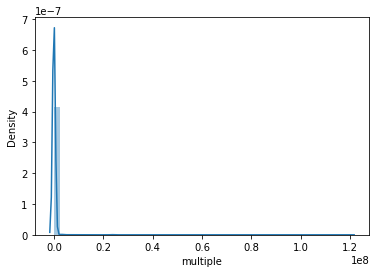

In [75]:
sns.distplot(ds["multiple"])

In [76]:
sum(ds['multiple']<=1)/len(ds)

0.3624689312344656

In [81]:
sum((ds['multiple']>1)&(ds['multiple']<=5))/len(ds)

0.3637116818558409

In [82]:
#divide the data into 3 groups (multiple: m>5, 5>=m>1, m<=1)
def classify(x):
    if x>5:
        return 2
    elif (x<=5)&(x>1):
        return 1
    else:
        return 0

In [83]:
ds["class"]=ds['multiple'].apply(classify)

In [85]:
ds.columns

Index(['numtrade_by2021', 'total_volume_by2021', 'numgoogle_search',
       'numitems_2022', 'min_price_2022', 'website', 'twitter_followers',
       'mean_trend_b4_2021may', 'std_trend_b4_2021may', 'mean_trend_from_may',
       'std_trend_from_may', 'day_per_trade', 'Collectible', 'Games',
       'Metaverse', 'Other', 'Utility', 'multiple', 'owner_ratio',
       'item_ratio', 'class'],
      dtype='object')

In [86]:
#logreg
y = ds["class"]
X = ds.drop(columns=["class","multiple"])
X.head()

,numtrade_by2021,total_volume_by2021,numgoogle_search,numitems_2022,min_price_2022,website,twitter_followers,mean_trend_b4_2021may,std_trend_b4_2021may,mean_trend_from_may,std_trend_from_may,day_per_trade,Collectible,Games,Metaverse,Other,Utility,owner_ratio,item_ratio
Unnamed: 0,,,,,,,,,,,,,,,,,,,
Cryptokittie,366777,5.584864e+04,2260000,2000000.0,0.035200,1,53800,38.363636,29.207098,32.024390,11.161290,0.003193,0,0,0,0,0,0.056750,0.001302
Cryptofighter,2139,4.068153e+01,30100,5000.0,0.200000,1,3164,0.000000,0.000000,8.829268,27.448044,0.529687,0,0,0,1,0,0.260000,0.043400
Cryptosaga,669,2.870632e+01,776000,3900.0,0.007231,1,0,0.000000,0.000000,2.439024,15.617376,1.666667,0,0,0,1,0,0.116667,0.000000
Axie,171278,1.460505e+05,6100000,283800.0,0.096899,1,912300,1.454545,0.687552,46.707317,23.624398,0.005617,0,1,0,0,0,0.159619,0.000000
Decentraland,13661,1.099707e+08,5740000,97300.0,4.728000,1,524500,17.909091,8.926976,29.292683,30.350654,0.075910,0,0,1,0,0,0.068859,0.010493


In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

#Scale it 
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [90]:
# Import module for fitting
from sklearn.linear_model import LogisticRegression

# Create instance (i.e. object) of LogisticRegression
logmodel = LogisticRegression()

# Fit the model using the training data
logmodel.fit(X_train, y_train)

LogisticRegression()

In [91]:
#Predicting the target for test data
predictions = logmodel.predict(X_test)
predictions

array([0, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 0, 0, 1, 1, 1, 0, 1, 2, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 2, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 0, 2, 1, 1, 0, 0, 2, 1, 0, 2, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 2, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 2, 0, 0, 1, 0, 1, 2, 1, 1, 1, 2, 2, 1,
       0, 2, 1, 0, 0, 1, 2, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 2, 1, 2, 1, 0, 1,
       1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 0, 1, 2, 1, 1, 1, 1, 1, 1, 0, 0, 2, 1, 1, 1, 1, 2,
       1, 1, 0, 2, 1, 0, 1, 2, 1, 2, 1, 1, 2, 2, 1,

In [92]:
X_test.shape

(725, 19)

In [93]:
print(X_test[0:3])

[[-0.05561841 -0.05157682 -0.12390686 -0.08340698 -0.0159101   0.62368282
   0.27381507 -0.50190463 -0.53903721 -0.53085667 -0.70781228  0.92650169
  -0.15772964 -0.13447372 -0.07717465  0.33453809 -0.06451133 -0.05696419
  -0.04135484]
 [-0.05537978 -0.05129525  0.13421227 -0.12650896 -0.08324543  0.62368282
  -0.04531432  0.02101127  1.3812839  -0.18849521  1.16938119 -0.02364978
  -0.15772964 -0.13447372 -0.07717465  0.33453809 -0.06451133 -0.05864967
  -0.04218916]
 [-0.05180027 -0.05157643 -0.12377868 -0.13785574 -0.08909127  0.62368282
  -0.04501852 -0.50190463 -0.53903721 -0.53085667 -0.70781228 -0.38067639
  -0.15772964 -0.13447372 -0.07717465  0.33453809 -0.06451133 -0.05655572
  -0.03712947]]


In [94]:
print(predictions[0:3])

[0 1 1]


In [95]:
print(y_test[0:3])

Unnamed: 0
Elijayneartstore    2
Baeige              0
Cryptoduckie        2
Name: class, dtype: int64


In [96]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.45241379310344826

In [97]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       0.44      0.24      0.31       269
           1       0.41      0.75      0.53       253
           2       0.66      0.36      0.46       203

    accuracy                           0.45       725
   macro avg       0.50      0.45      0.43       725
weighted avg       0.49      0.45      0.43       725



In [101]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions).ravel().reshape(3,3)
#column=true condition

array([[ 64, 185,  20],
       [ 44, 191,  18],
       [ 39,  91,  73]], dtype=int64)

In [102]:
#decision tree
# Import module for fitting
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
# Fit the model using the training data
# X_train -> parameter supplies the data features
# y_train -> parameter supplies the target labels
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [103]:
# evaluate the model
from sklearn.metrics import classification_report
y_test_pred = model.predict(X_test)
print(f"Testing report {classification_report(y_test,y_test_pred)}")


Testing report               precision    recall  f1-score   support

           0       0.65      0.62      0.64       269
           1       0.54      0.51      0.52       253
           2       0.65      0.73      0.69       203

    accuracy                           0.61       725
   macro avg       0.61      0.62      0.62       725
weighted avg       0.61      0.61      0.61       725



In [104]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_test_pred)

#positive = survived
#negative = not survived

                #Actual 

              #  True positive(50)           False positive  (7)

              #  False Negative (5)           True Negative(60)



array([[168,  78,  23],
       [ 68, 129,  56],
       [ 23,  32, 148]], dtype=int64)

In [105]:
#KNN
#import the KNeighborsClassifier class from sklearn
from sklearn.neighbors import KNeighborsClassifier

#import metrics model to check the accuracy 
from sklearn import metrics
#Try running from k=1 through 25 and record testing accuracy
k_range = range(1,26)
scores = {}
scores_list = []
for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train,y_train)
        y_pred=knn.predict(X_test)
        scores[k] = metrics.accuracy_score(y_test,y_pred)
        scores_list.append(metrics.accuracy_score(y_test,y_pred))

In [106]:
#import the KNeighborsClassifier class from sklearn
from sklearn.neighbors import KNeighborsClassifier
knnmodel = KNeighborsClassifier(n_neighbors=3)
knnmodel.fit(X_train,y_train)
predictions=knnmodel.predict(X_test)
accuracy_score(y_test, predictions)

0.45655172413793105

In [107]:
#Testing accuracy for each value of K
scores

{1: 0.4827586206896552,
 2: 0.4675862068965517,
 3: 0.45655172413793105,
 4: 0.463448275862069,
 5: 0.4675862068965517,
 6: 0.4579310344827586,
 7: 0.46206896551724136,
 8: 0.463448275862069,
 9: 0.45517241379310347,
 10: 0.44413793103448274,
 11: 0.45655172413793105,
 12: 0.47172413793103446,
 13: 0.46206896551724136,
 14: 0.4689655172413793,
 15: 0.463448275862069,
 16: 0.46482758620689657,
 17: 0.4731034482758621,
 18: 0.4731034482758621,
 19: 0.4772413793103448,
 20: 0.47586206896551725,
 21: 0.47448275862068967,
 22: 0.4786206896551724,
 23: 0.4772413793103448,
 24: 0.4868965517241379,
 25: 0.4731034482758621}

Text(0, 0.5, 'Testing Accuracy')

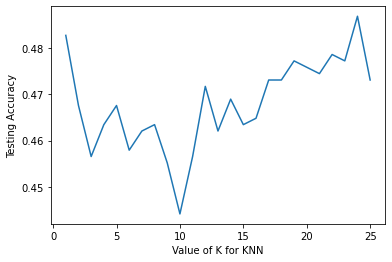

In [108]:
#plot the relationship between K and the testing accuracy
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [110]:
#random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rnd_clf = RandomForestClassifier(n_estimators=500,n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)

#n_estimators: no. of decision trees
#n_jobs: The number of jobs to run in parallel. None means 1 , -1 means using all processors
y_pred_rf = rnd_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_rf))

0.7282758620689656


In [177]:
#random forest 2nd
for i in [600,700,800,900,1000]:

    rnd_clf = RandomForestClassifier(n_estimators=700,n_jobs=-1, random_state=42)
    rnd_clf.fit(X_train, y_train)

    #n_estimators: no. of decision trees
    #n_jobs: The number of jobs to run in parallel. None means 1 , -1 means using all processors
    y_pred_rf = rnd_clf.predict(X_test)
    print("try",i,":",accuracy_score(y_test, y_pred_rf))

try 600 : 0.7282758620689656
try 700 : 0.7282758620689656
try 800 : 0.7282758620689656
try 900 : 0.7282758620689656
try 1000 : 0.7282758620689656


In [179]:
from sklearn.metrics import roc_auc_score

leaf_size = [2,3,5,10]
n_estimators_list = [1,2,3,50,100,250,500]

for estim_list in n_estimators_list:
    model = RandomForestClassifier(n_estimators=estim_list)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    result = confusion_matrix(y_test, y_pred)
    result2 = accuracy_score(y_test, y_pred)
    print('\n Estimator value: ', estim_list)
    print(result)
    print('Accuracy: ', result2)


 Estimator value:  1
[[135  98  36]
 [ 72 140  41]
 [ 33  31 139]]
Accuracy:  0.5710344827586207

 Estimator value:  2
[[213  46  10]
 [132 109  12]
 [ 33  67 103]]
Accuracy:  0.5862068965517241

 Estimator value:  3
[[178  78  13]
 [103 117  33]
 [ 28  47 128]]
Accuracy:  0.5834482758620689

 Estimator value:  50
[[184  67  18]
 [ 68 162  23]
 [ 12  38 153]]
Accuracy:  0.6882758620689655

 Estimator value:  100
[[193  63  13]
 [ 55 172  26]
 [ 10  34 159]]
Accuracy:  0.7227586206896551

 Estimator value:  250
[[188  68  13]
 [ 55 172  26]
 [ 10  36 157]]
Accuracy:  0.713103448275862

 Estimator value:  500
[[184  72  13]
 [ 55 172  26]
 [  8  38 157]]
Accuracy:  0.7075862068965517


In [180]:
for leaf_size in leaf_size:
    model = RandomForestClassifier(n_estimators=100, min_samples_leaf = leaf_size)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    result = confusion_matrix(y_test, y_pred)
    result2 = accuracy_score(y_test, y_pred)
    print('\n Leaf size: ', leaf_size)
    print('Accuracy: ', result2)


 Leaf size:  2
Accuracy:  0.713103448275862

 Leaf size:  3
Accuracy:  0.7006896551724138

 Leaf size:  5
Accuracy:  0.6937931034482758

 Leaf size:  10
Accuracy:  0.6993103448275862


In [181]:
#randomized search
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [182]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [183]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    accuracy = accuracy_score(test_labels,predictions)
    print('Model Performance')
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = RandomForestClassifier(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance
Accuracy = 0.64%.


In [184]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

Model Performance
Accuracy = 0.72%.


In [185]:
best_random

RandomForestClassifier(min_samples_split=5, n_estimators=200)

In [186]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of 12.80%.


In [187]:
#grid search
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf_gd = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf_gd, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [188]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


{'bootstrap': True,
 'max_depth': 90,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 200}

In [189]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_train, y_train)

Model Performance
Accuracy = 0.93%.


In [190]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Improvement of 45.53%.


In [111]:
#ADA
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), n_estimators=100,random_state=42)

#n_estimators: The maximum number of estimators at which boosting is terminated. 

ada_clf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   n_estimators=100, random_state=42)

In [112]:
y_pred = ada_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.6496551724137931


In [113]:
#XGBoost
import xgboost
xgmodel = xgboost.XGBClassifier()

# Fit the model using the training data
xgmodel.fit(X_train, y_train)

C:\Users\Kent\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:57:42] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [114]:
y_pred = xgmodel.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.7448275862068966


In [115]:
#SVM
# Import module for fitting
from sklearn.svm import LinearSVC
# Create instance (i.e. object) of LogisticRegression
model = LinearSVC()
# Fit the model using the training data
# X_train -> parameter supplies the data features
# y_train -> parameter supplies the target labels
model.fit(X_train, y_train)

C:\Users\Kent\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()

In [116]:
#Predicting the target for test data
predictions = model.predict(X_test)

In [117]:
predictions

array([0, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 0, 0, 1, 1, 1, 0, 1, 2, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 2, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 2, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 0, 2, 1, 1, 0, 0, 2, 1, 0, 2, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 2, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 2, 0, 0, 1, 0, 1, 2, 1, 1, 1, 2, 2, 1,
       0, 2, 1, 0, 0, 1, 2, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 2, 1, 2,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 2, 1, 2, 1, 0, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 2, 1, 1, 0, 1, 1,
       0, 1, 0, 2, 1, 0, 1, 2, 1, 1, 1, 1, 1, 2, 1,

In [118]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.46      0.27      0.34       269
           1       0.40      0.75      0.53       253
           2       0.62      0.30      0.40       203

    accuracy                           0.45       725
   macro avg       0.49      0.44      0.42       725
weighted avg       0.49      0.45      0.42       725



In [125]:
#ANN (1st)
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [122]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 19))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the third  hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 3, kernel_initializer = 'uniform', activation = 'softmax'))


In [126]:
# Compiling the ANN
opt = SGD(lr=0.01, momentum=0.9)
classifier.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])


C:\Users\Kent\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [130]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)

In [131]:
y_train

array([[0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [136]:
import tensorflow
tensorflow.config.run_functions_eagerly(True)

In [139]:
# fit model
classifier.fit(X_train, y_train, batch_size=10, epochs=50, verbose=0)

In [140]:
# Part 3 - Making predictions and evaluating the model
# Predicting the Test set results
y_pred_ann = classifier.predict(X_test)

In [141]:
y_pred_ann

array([[0.34885648, 0.3717186 , 0.279425  ],
       [0.34885648, 0.3717186 , 0.279425  ],
       [0.34885648, 0.3717186 , 0.279425  ],
       ...,
       [0.34885648, 0.3717186 , 0.279425  ],
       [0.34885648, 0.3717186 , 0.279425  ],
       [0.34885648, 0.3717186 , 0.279425  ]], dtype=float32)

In [144]:
#ANN (2nd)
# mlp for the blobs multi-class classification problem with cross-entropy loss
from sklearn.datasets import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot

In [149]:
# define model
model = Sequential()
model.add(Dense(50, input_dim=19, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))

In [150]:
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])


In [151]:
# fit model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=0)


In [157]:
y_pred_ann = model.predict(X_test)

In [158]:
y_pred_ann

array([[0.25083995, 0.34989917, 0.39926094],
       [0.28717032, 0.58831364, 0.12451606],
       [0.36107656, 0.38728943, 0.251634  ],
       ...,
       [0.37819302, 0.40606886, 0.21573816],
       [0.3184902 , 0.5636454 , 0.11786437],
       [0.41171765, 0.44653246, 0.1417499 ]], dtype=float32)

In [159]:
y_test

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]], dtype=float32)

In [154]:
# evaluate the model
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.556, Test: 0.490


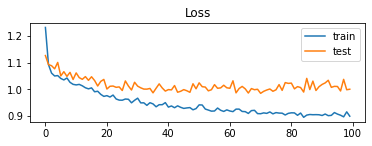

In [155]:
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

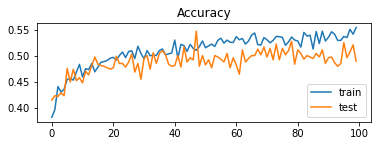

In [156]:
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [169]:
#ANN(2nd:modified)
from keras.layers import Dropout
model = Sequential()
model.add(Dense(10, input_dim=19, activation='relu', kernel_initializer='uniform'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='relu', kernel_initializer='uniform'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))

# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# fit model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=10, epochs=50, verbose=0)

y_pred_ann = model.predict(X_test)
y_pred_ann

array([[0.36809215, 0.4341901 , 0.19771782],
       [0.36169606, 0.4270371 , 0.21126682],
       [0.37915155, 0.4456542 , 0.17519419],
       ...,
       [0.3827475 , 0.44867438, 0.16857818],
       [0.39350986, 0.4488319 , 0.15765819],
       [0.38901347, 0.45241016, 0.1585764 ]], dtype=float32)

In [170]:
y_test

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]], dtype=float32)

In [171]:
# evaluate the model
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.484, Test: 0.465
